In [177]:
#import usefull libraries
import numpy as np
#numpy is an open source library for working on multidimensional arrays
import glob
#glob is used to read files of the speciied type
import os

In [178]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer

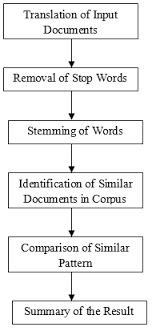

In [179]:
document1="Software engineering is the discipline of designing, creating and maintaining software by applying technologies and practices from computer science, project management, engineering, application domains, interface design, digital assets management and other fields."
document2=" discipline of designing, creating and maintaining software by applying technologies.as well as practices from computer science, project management, engineering, application domains, interface design, digital assets management and other fields."

# join sentences by removing line spaces

In [180]:
#join sentences

def joining(doc1,doc2):
    doc1=doc1.split()
    for i in range(0,doc1.count(' \n')):
        doc1.remove(' \n')
    for i in range(0,doc1.count('\n')):
        doc11.remove('\n')
    doc1=' '.join(doc1)
    
    
    doc2=doc2.split()
    for i in range(0,doc2.count(' \n')):
        doc2.remove(' \n')
    for i in range(0,doc2.count('\n')):
        doc2.remove('\n')
    doc2=' '.join(doc2)
    return doc1,doc2
    

docu1,docu2=joining(document1,document2)
    
print(docu1)
print(docu2)

Software engineering is the discipline of designing, creating and maintaining software by applying technologies and practices from computer science, project management, engineering, application domains, interface design, digital assets management and other fields.
discipline of designing, creating and maintaining software by applying technologies.as well as practices from computer science, project management, engineering, application domains, interface design, digital assets management and other fields.


# stemming

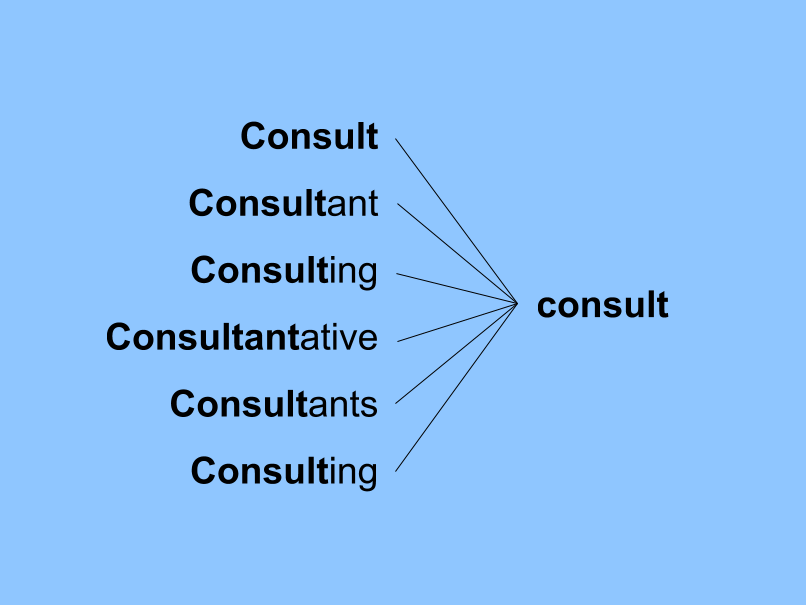

In [145]:
def stemSentence(sentence):
    porter= PorterStemmer()
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

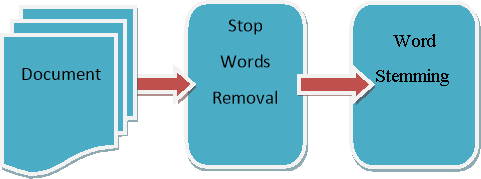

In [146]:
def remove_common_words_steming(main,generic):
    main=word_tokenize(main)
    resultwords=[i for i in main if i.lower() not in generic]
    result=' '.join(resultwords)
    result=stemSentence(result)
    return result

In [147]:
common_words=['do','she','they','we','are','is','the','and','a','an','in','as','in','of',',','.']

In [148]:
document1=remove_common_words_steming(docu1,common_words)
document2=remove_common_words_steming(docu2,common_words)

In [149]:
print(document1)
print(document2)

softwar engin disciplin design creat maintain softwar by appli technolog practic from comput scienc project manag engin applic domain interfac design digit asset manag other field
disciplin design creat maintain softwar by appli technologies.a well practic from comput scienc project manag engin applic domain interfac design digit asset manag other field


# define algorithms booyermoore,KMP,Robin-karp

In [150]:
def badCharHeuristic(string, size):
    NO_OF_CHARS = 256
    # Initialize all occurrence as -1
    badChar = [-1]*NO_OF_CHARS
    
    
     # Fill the actual value of last occurrence
    for i in range(size):
        badChar[ord(string[i])] = i;

    # retun initialized list
    return badChar
    
def boyer_moore(txt, pat):
    m = len(pat)
    n = len(txt)
    count=0
    
    badChar = badCharHeuristic(pat, m)
    
    s = 0
    while(s <= n-m):
        j = m-1
        while j>=0 and pat[j] == txt[s+j]:
            j -= 1
        if j<0:
            count=count+1
            #print("Pattern occur at shift = {}".format(s))
            s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
        else:
            s += max(1, j-badChar[ord(txt[s+j])])
    return count 

In [151]:
text="softwar engin discipli creat maintain softwar by appli technolog practic from comput scienc project"
pattern="softwar"
boyer_moore(text, pattern)

2

In [152]:

# Rabin Karp Algorithm given in CLRS book
 
# pat  -> pattern
# txt  -> text
# q    -> A prime number
 
def robin_karp(txt,pat):
    q = 101
    d = 256
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0    # hash value for pattern
    t = 0    # hash value for txt
    h = 1
    count=0
 
    # The value of h would be "pow(d, M-1)%q"
    for i in range(M-1):
        h = (h*d)%q
 
    # Calculate the hash value of pattern and first window
    # of text
    for i in range(M):
        p = (d*p + ord(pat[i]))%q
        t = (d*t + ord(txt[i]))%q
 
    # Slide the pattern over text one by one
    for i in range(N-M+1):
        # Check the hash values of current window of text and
        # pattern if the hash values match then only check
        # for characters on by one
        if p==t:
            # Check for characters one by one
            for j in range(M):
                if txt[i+j] != pat[j]:
                    break
                else: j+=1
 
            # if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
            if j==M:
                #print("Pattern found at index " + str(i))
                count+=1
 
        # Calculate hash value for next window of text: Remove
        # leading digit, add trailing digit
        if i < N-M:
            t = (d*(t-ord(txt[i])*h) + ord(txt[i+M]))%q
 
            # We might get negative values of t, converting it to
            # positive
            if t < 0:
                t = t+q
        
    return count


In [153]:
doc1 = "Software is engineering is the discipline o"
doc2= "is engineering"
robin_karp(doc1,'is')

3

In [154]:
# Python program for KMP Algorithm
def KMPSearch(txt, pat):
    M = len(pat)
    N = len(txt)
    count=0
  
    # create lps[] that will hold the longest prefix suffix 
    # values for pattern
    lps = [0]*M
    j = 0 # index for pat[]
  
    # Preprocess the pattern (calculate lps[] array)
    computeLPSArray(pat, M, lps)
  
    i = 0 # index for txt[]
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
  
        if j == M:
            count+=1
            #print ("Found pattern at index " + str(i-j))
            j = lps[j-1]
  
        # mismatch after j matches
        elif i < N and pat[j] != txt[i]:
            # Do not match lps[0..lps[j-1]] characters,
            # they will match anyway
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
    return count
  
def computeLPSArray(pat, M, lps):
    len = 0 # length of the previous longest prefix suffix
  
    lps[0] # lps[0] is always 0
    i = 1
  
    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i]== pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            # This is tricky. Consider the example.
            # AAACAAAA and i = 7. The idea is similar 
            # to search step.
            if len != 0:
                len = lps[len-1]
  
                # Also, note that we do not increment i here
            else:
                lps[i] = 0
                i += 1

In [155]:
doc1 = "Software is engineering is the discipline o"
doc2= "is engineering"
KMPSearch(doc1,'is')

3

# calculate plagarism 

In [156]:
def plagarism_1(text1,text2,func):
    text2=word_tokenize(text2)
    text1=text1+' '
    sim=0
    for j in range(len(text2)):
        s=func(text1,text2[j])
        if s>0:
            sim+=1

    com=(len(word_tokenize(text1)))
    print(sim,com)
    plag=sim/com
    print(plag)
    return plag


In [157]:
def plagarism_2(text1,text2,func):
    text2=word_tokenize(text2)
    text1=text1+' '
    sim=0
    for j in range(len(text2)):
        s=func(text1,text2[j])
        if s>0:
            sim+=1
 
    com=len(word_tokenize(text1))+len(text2)
    print(sim,com)
    plag=2*sim/com
    print(plag)
    return plag


In [158]:
def msx_string(txt1,txt2):
    if len(txt2)>len(txt1):
        text1=txt2
        text2=txt1
    else:
        text1=txt1
        text2=txt2
    return text1,text2

In [159]:
document1,document2=msx_string(document1,document2)

In [160]:
plagarism_1(document1,document2,boyer_moore)

23 26
0.8846153846153846


0.8846153846153846

In [161]:
plagarism_2(document1,document2,boyer_moore)

23 51
0.9019607843137255


0.9019607843137255

In [162]:
plagarism_1(document1,document2,robin_karp)

23 26
0.8846153846153846


0.8846153846153846

In [163]:
plagarism_2(document1,document2,robin_karp)

23 51
0.9019607843137255


0.9019607843137255

In [164]:
plagarism_1(document1,document2,KMPSearch)

23 26
0.8846153846153846


0.8846153846153846

In [165]:
plagarism_2(document1,document2,KMPSearch)

23 51
0.9019607843137255


0.9019607843137255

# check text files


In [166]:
plag = int(input("Enter the percentage of plagiarism allowed\n"))


Enter the percentage of plagiarism allowed
10


In [168]:
k=0
#path1 = input("Enter the path of the folder to scan:\n")
os.chdir('/media/jayasanka/New Volume/cs/AI/NLP project/plagarism/Plagiarism Checker/textfiles')

In [112]:
#enter new answer with name
stuName=str(input("Enter your name: "))
answer=str(input(":"))
#save in a text file
f =open(stuName+'.txt',"w+")
f.write(answer)
f.close() 

Enter your name: w
:


In [169]:
stuName='jayasanka'

In [170]:
newAnsfile=stuName+'.txt'
#opening all text files within the folder and stores them in an array 
myFiles = glob.glob('*.txt') 
print("\nThe text files available are :\n")
print(myFiles)
print("\n")



The text files available are :

['blank.txt', 'copy.txt', 'fullcopy.txt', 'jaya2.txt', 'jayasanka.txt', 'stu1.txt', 'stu2.txt', 'stu3.txt', 'w.txt']




In [171]:
newAns=0
for x in range(len(myFiles)):
    if myFiles[x]==newAnsfile:
        newAns=x
            
with open(myFiles[newAns], 'r') as file:
    str1 = file.read()
print(str1)

Software engineering is the discipline of designing, creating and maintaining software by applying technologies and practices from computer science, project management, engineering, application domains, interface design, digital assets management and other fields.



# compare students files and check plagarism by booyermoore

In [172]:
for i in range(len(myFiles)):
    with open(myFiles[i], 'r') as file:
        str2 = file.read()
        
    docu1,docu2=joining(str1,str2)
    str1=remove_common_words_steming(docu1,common_words)
    str2=remove_common_words_steming(docu2,common_words)
    
           
    if (myFiles[i] != myFiles[newAns]):
        #print(str1)
        #print(str2)
        #str1,str2=msx_string(str1,str2)
        n = plagarism_2(str1,str2,boyer_moore)*100
        if(n>plag):
          print("For the files",myFiles[i],"and",myFiles[newAns],"presentage of plagiarism is ",n,"%  \n") 
          k = k+1
if k == 0:
    print("No documents are plagiarised")

0 26
0.0
24 53
0.9056603773584906
For the files copy.txt and jayasanka.txt presentage of plagiarism is  90.56603773584906 %  

26 52
1.0
For the files fullcopy.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

26 52
1.0
For the files jaya2.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

4 63
0.12698412698412698
For the files stu1.txt and jayasanka.txt presentage of plagiarism is  12.698412698412698 %  

3 59
0.1016949152542373
For the files stu2.txt and jayasanka.txt presentage of plagiarism is  10.16949152542373 %  

2 48
0.08333333333333333
0 26
0.0


# compare students files and check plagarism by robin karp

In [173]:
for i in range(len(myFiles)):
    with open(myFiles[i], 'r') as file:
        str2 = file.read() 
        
    docu1,docu2=joining(str1,str2)
    str1=remove_common_words_steming(docu1,common_words)
    str2=remove_common_words_steming(docu2,common_words)
    
           
    if (myFiles[i] != myFiles[newAns]):
        #print(str1)
        #print(str2)
        #str1,str2=msx_string(str1,str2)
        n = plagarism_2(str1,str2,robin_karp)*100
        if(n>plag):
          print("For the files",myFiles[i],"and",myFiles[newAns],"presentage of plagiarism is ",n,"%  \n") 
          k = k+1
if k == 0:
    print("No documents are plagiarised")

0 26
0.0
24 53
0.9056603773584906
For the files copy.txt and jayasanka.txt presentage of plagiarism is  90.56603773584906 %  

26 52
1.0
For the files fullcopy.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

26 52
1.0
For the files jaya2.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

4 63
0.12698412698412698
For the files stu1.txt and jayasanka.txt presentage of plagiarism is  12.698412698412698 %  

3 59
0.1016949152542373
For the files stu2.txt and jayasanka.txt presentage of plagiarism is  10.16949152542373 %  

2 48
0.08333333333333333
0 26
0.0


# compare students files and check plagarism by KMPSearch

In [174]:
for i in range(len(myFiles)):
    with open(myFiles[i], 'r') as file:
        str2 = file.read()
        
    docu1,docu2=joining(str1,str2)
    str1=remove_common_words_steming(docu1,common_words)
    str2=remove_common_words_steming(docu2,common_words)
  
           
    if (myFiles[i] != myFiles[newAns]):
        #print(str1)
        #print(str2)
        #str1,str2=msx_string(str1,str2)
        n = plagarism_2(str1,str2,KMPSearch)*100
        if(n>plag):
          print("For the files",myFiles[i],"and",myFiles[newAns],"presentage of plagiarism is ",n,"%  \n") 
          k = k+1
if k == 0:
    print("No documents are plagiarised")

0 26
0.0
24 53
0.9056603773584906
For the files copy.txt and jayasanka.txt presentage of plagiarism is  90.56603773584906 %  

26 52
1.0
For the files fullcopy.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

26 52
1.0
For the files jaya2.txt and jayasanka.txt presentage of plagiarism is  100.0 %  

4 63
0.12698412698412698
For the files stu1.txt and jayasanka.txt presentage of plagiarism is  12.698412698412698 %  

3 59
0.1016949152542373
For the files stu2.txt and jayasanka.txt presentage of plagiarism is  10.16949152542373 %  

2 48
0.08333333333333333
0 26
0.0
